#### Business Analytics Term project

# **Exploratory Data Analysis with ERP Beverage Dataset**

In [42]:
# import necessary libraries (Pandas , Numpy , matplotlib , scikit-learn, seaborn  )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [43]:
# Firstly store "ERP_Beverage_Data_Medium" file in Your Google Drive to run the following code block
# connect with google drive (to get data from google drive)
# from google.colab import drive
# drive.mount('/content/drive')

In [44]:
# get each csv file and assign it in the variable
# variable_name = call pandas read_csv function ("file paths")
customer = pd.read_csv("./ERP_Beverage_Data_Medium/CustomerMaster.csv")
inventory = pd.read_csv("./ERP_Beverage_Data_Medium/InventoryBalances.csv")
product = pd.read_csv("./ERP_Beverage_Data_Medium/ProductMaster.csv")
pline = pd.read_csv("./ERP_Beverage_Data_Medium/ProductionLineMaster.csv")
porder = pd.read_csv("./ERP_Beverage_Data_Medium/ProductionOrders.csv")
sales = pd.read_csv("./ERP_Beverage_Data_Medium/SalesOrders.csv")
supplier = pd.read_csv("./ERP_Beverage_Data_Medium/SupplierMaster.csv")
wh = pd.read_csv("./ERP_Beverage_Data_Medium/WarehouseMaster.csv")

In [45]:
# in variable called dataframe : assign dictionary {} ,
#include {"key": value} where key is the name of dataframe and value is the dataframe table

dataframes = {"Customer":customer,
              "Inventory":inventory,"Product":product,"Product Line":pline,"Pruduct Order":porder,
              "Sales":sales,"Supplier":supplier,"Warehouse":wh}

In [46]:
#shape return (rows,columns)
for name,df in dataframes.items():
    print(f"{name} : {df.shape}", end='\n\n')

Customer : (500, 5)

Inventory : (15000, 6)

Product : (25, 5)

Product Line : (10, 4)

Pruduct Order : (5000, 7)

Sales : (25000, 7)

Supplier : (100, 5)

Warehouse : (15, 4)



In [47]:
#for a quick view for each table use .head()
for name,df in dataframes.items():
  print(f"{name}\n{df.head()}", end='\n\n')

Customer
   CustomerID                 CustomerName       CustomerCity CustomerCountry  \
0        2001                 Callahan Inc     Gilbertchester          Mexico   
1        2002  Aguirre, Baxter and Hopkins    East Nancymouth           Japan   
2        2003                Mcbride-Kelly       Timothymouth       Australia   
3        2004                   Oliver Inc  West Michelleland           Italy   
4        2005                Morrison-King           Boydfort              UK   

  PaymentTerms  
0        NET45  
1          COD  
2          COD  
3          COD  
4          EOM  

Inventory
   InventoryID  WarehouseID  ProductID  OnHand  OnOrder LastUpdated
0        30001         5010       1016    8279     2368  2025-11-26
1        30002         5007       1004   10829     2365  2025-02-20
2        30003         5009       1006    9405     2737  2025-03-01
3        30004         5010       1003   13334     2006  2025-04-14
4        30005         5003       1009    3914     

#### There is no missing values in the dataset.

In [48]:
#check there is a null values in each table
#isna() return Ture=1/False=0 , and sum them return (total number of 1 or True which is missing values cells)
for name,df in dataframes.items():
    print(f"{name}\n{customer.isna().sum()}", end='\n\n')

Customer
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Inventory
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Product
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Product Line
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Pruduct Order
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Sales
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Supplier
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Warehouse
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
Paym

#### There is no duplicate in the dataset.

In [49]:
for name,df in dataframes.items():
    print(f"{name}\n{inventory.duplicated().sum()}", end='\n\n')

Customer
0

Inventory
0

Product
0

Product Line
0

Pruduct Order
0

Sales
0

Supplier
0

Warehouse
0



In [50]:
for name,df in dataframes.items():
    print(name,end='\n\n')
    print(f"{df.info()}", end='\n\n')

Customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null    int64 
 1   CustomerName     500 non-null    object
 2   CustomerCity     500 non-null    object
 3   CustomerCountry  500 non-null    object
 4   PaymentTerms     500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB
None

Inventory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InventoryID  15000 non-null  int64 
 1   WarehouseID  15000 non-null  int64 
 2   ProductID    15000 non-null  int64 
 3   OnHand       15000 non-null  int64 
 4   OnOrder      15000 non-null  int64 
 5   LastUpdated  15000 non-null  object
dtypes: int64(5), object(1)
memory usage: 703.3+ KB
None

Product



Since data type for string and date-time are set default as object, change it to specific data type.

In [51]:
for name in dataframes:
    dataframes[name]= dataframes[name].convert_dtypes()

In [52]:
inventory['LastUpdated'] = pd.to_datetime(inventory['LastUpdated'])
dataframes['Inventory'] = inventory
print(inventory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InventoryID  15000 non-null  int64         
 1   WarehouseID  15000 non-null  int64         
 2   ProductID    15000 non-null  int64         
 3   OnHand       15000 non-null  int64         
 4   OnOrder      15000 non-null  int64         
 5   LastUpdated  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 703.3 KB
None


In [53]:
porder['ProductionDate'] = pd.to_datetime(porder['ProductionDate'])
dataframes['Product Order'] = porder
print(porder.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ProductionOrderID    5000 non-null   int64         
 1   ProductionLineID     5000 non-null   int64         
 2   ProductID            5000 non-null   int64         
 3   ProductionDate       5000 non-null   datetime64[ns]
 4   BatchSize            5000 non-null   int64         
 5   UnitCost             5000 non-null   float64       
 6   TotalProductionCost  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 273.6 KB
None


In [54]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
dataframes['Sales'] = sales
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SalesOrderID  25000 non-null  int64         
 1   OrderDate     25000 non-null  datetime64[ns]
 2   CustomerID    25000 non-null  int64         
 3   ProductID     25000 non-null  int64         
 4   Quantity      25000 non-null  int64         
 5   UnitPrice     25000 non-null  float64       
 6   TotalAmount   25000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.3 MB
None


In [55]:
for name,df in dataframes.items():
    print(name,end='\n\n')
    print(f"{df.info()}", end='\n\n')

Customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null    Int64 
 1   CustomerName     500 non-null    string
 2   CustomerCity     500 non-null    string
 3   CustomerCountry  500 non-null    string
 4   PaymentTerms     500 non-null    string
dtypes: Int64(1), string(4)
memory usage: 20.1 KB
None

Inventory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InventoryID  15000 non-null  int64         
 1   WarehouseID  15000 non-null  int64         
 2   ProductID    15000 non-null  int64         
 3   OnHand       15000 non-null  int64         
 4   OnOrder      15000 non-null  int64         
 5   LastUpdated  15000 non-null  datetime64[ns]
dtyp

In [56]:
for name, df in dataframes.items():
    print(name, end='\n')
    print(f"{df.describe()}", end='\n\n')

Customer
       CustomerID
count       500.0
mean       2250.5
std    144.481833
min        2001.0
25%       2125.75
50%        2250.5
75%       2375.25
max        2500.0

Inventory
        InventoryID   WarehouseID     ProductID        OnHand       OnOrder  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean   37500.500000   5008.012467   1013.031400  10017.517467   2502.751333   
min    30001.000000   5001.000000   1001.000000      2.000000      0.000000   
25%    33750.750000   5004.000000   1007.000000   4973.500000   1254.000000   
50%    37500.500000   5008.000000   1013.000000  10007.000000   2506.000000   
75%    41250.250000   5012.000000   1019.000000  15126.500000   3759.000000   
max    45000.000000   5015.000000   1025.000000  19999.000000   5000.000000   
std     4330.271354      4.320612      7.210049   5832.702310   1444.128129   

                      LastUpdated  
count                       15000  
mean   2024-07-04 00:33:01.440000 

**Customer** table has only one numeric column but it is customerID. so it should be ignored for statistical analysis.

**Inventory** table has InventoryID   WarehouseID     ProductID which needed to ignore. There are two numeric columns :    
1. On Hand Qualtity and 2. On Order Quantity
Total Count for both values is 15000 rows.

The inventory shows **good health** with OnHand averaging 10,017.52, significantly larger than OnOrder at 2,502.75. Smaller, consistent OnOrder (median: 2,506) indicates proactive replenishment, while high OnHand variability (std: 5,832.70) suggests some stock distribution inefficiencies. Overall, the system effectively balances supply and demand.




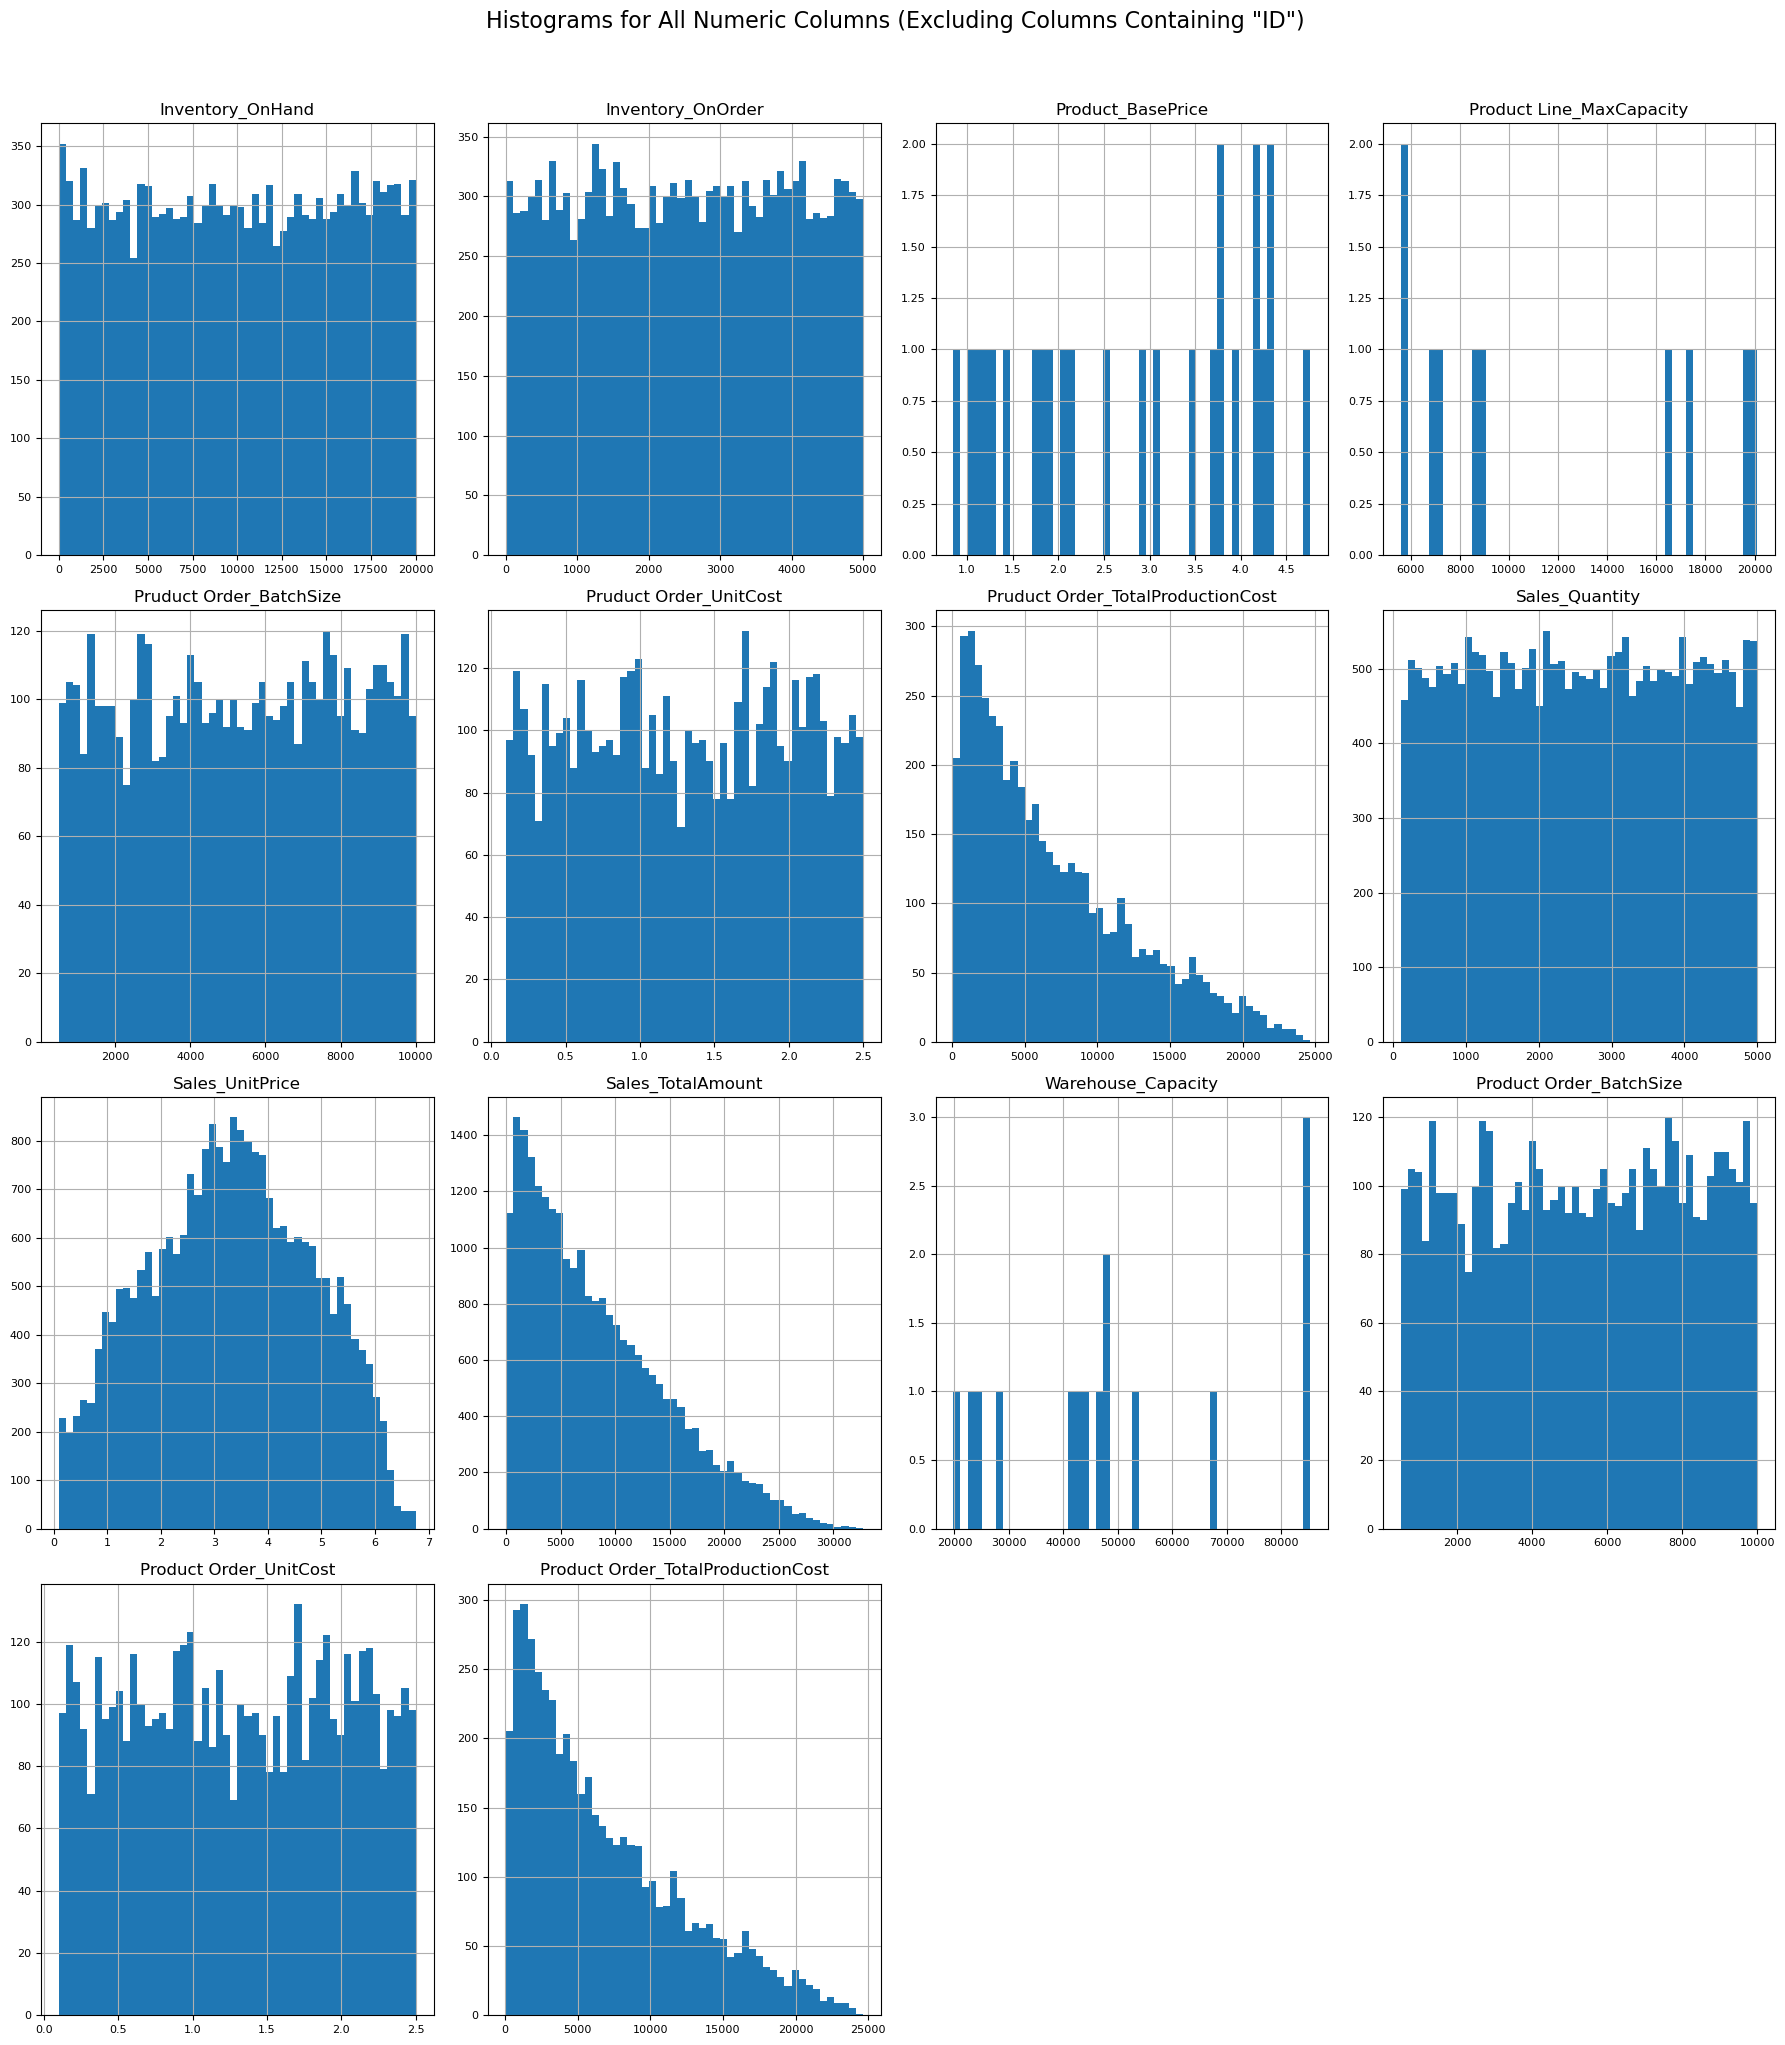

In [57]:
numeric_dfs = []

# Iterate through all DataFrames
for name, df in dataframes.items():
    # Select numeric columns, excluding those containing 'ID'
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])
    numeric_cols = numeric_cols.loc[:, ~numeric_cols.columns.str.contains('ID', case=False)]
    if not numeric_cols.empty:
        numeric_dfs.append(numeric_cols)

# Concatenate all numeric DataFrames
df_num = pd.concat(numeric_dfs, axis=1)

# Ensure column names are unique
df_num.columns = [f"{name}_{col}" for name, df in dataframes.items() for col in df.select_dtypes(include=['int64', 'float64']).columns if 'ID' not in col]

# Plot histograms for all numeric columns
axes = df_num.hist(figsize=(18, 20), bins=50, xlabelsize=8, ylabelsize=8)
for ax in axes.flatten():
    ax.title.set_fontsize(12)
plt.suptitle('Histograms for All Numeric Columns (Excluding Columns Containing "ID")', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Skipping correlation matrix for Customer: Less than 2 numeric columns (excluding 'ID').

Correlation Matrix for Inventory:

           OnHand   OnOrder
OnHand   1.000000 -0.007897
OnOrder -0.007897  1.000000


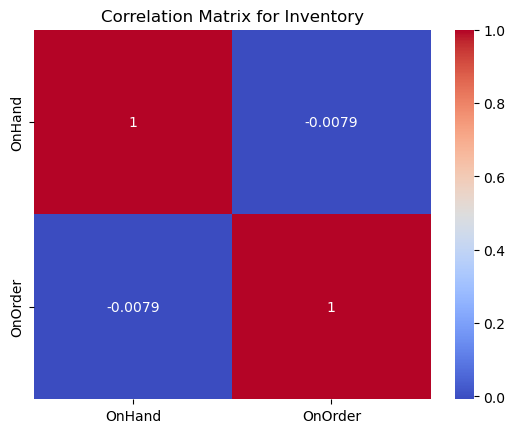


Skipping correlation matrix for Product: Less than 2 numeric columns (excluding 'ID').

Skipping correlation matrix for Product Line: Less than 2 numeric columns (excluding 'ID').

Correlation Matrix for Pruduct Order:

                     BatchSize  UnitCost  TotalProductionCost
BatchSize             1.000000 -0.006815             0.651136
UnitCost             -0.006815  1.000000             0.666590
TotalProductionCost   0.651136  0.666590             1.000000


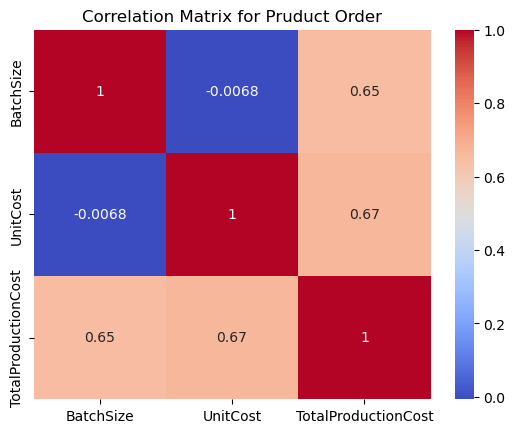


Correlation Matrix for Sales:

             Quantity  UnitPrice  TotalAmount
Quantity     1.000000  -0.001828     0.724062
UnitPrice   -0.001828   1.000000     0.602161
TotalAmount  0.724062   0.602161     1.000000


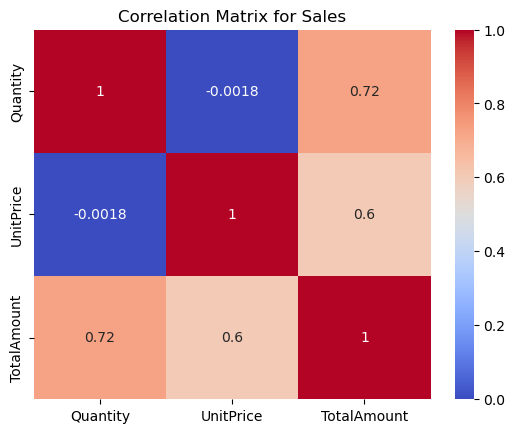


Skipping correlation matrix for Supplier: Less than 2 numeric columns (excluding 'ID').

Skipping correlation matrix for Warehouse: Less than 2 numeric columns (excluding 'ID').

Correlation Matrix for Product Order:

                     BatchSize  UnitCost  TotalProductionCost
BatchSize             1.000000 -0.006815             0.651136
UnitCost             -0.006815  1.000000             0.666590
TotalProductionCost   0.651136  0.666590             1.000000


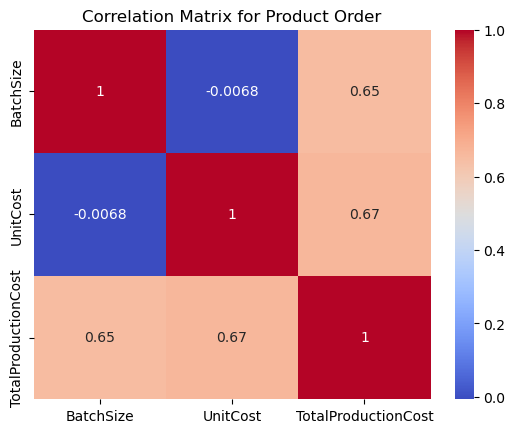

In [58]:
for name, df in dataframes.items():
    # Select only numeric columns (int and float) but exclude those ending with 'ID'
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    numeric_df = numeric_df.loc[:, ~numeric_df.columns.str.endswith('ID')]

    # Proceed only if there are more than one numeric columns
    if numeric_df.shape[1] > 1:
        # Calculate the correlation matrix
        correlation_matrix = numeric_df.corr()
        print(f"\nCorrelation Matrix for {name}:\n")
        print(correlation_matrix)
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Correlation Matrix for {name}')
        plt.show()
    else:
        print(f"\nSkipping correlation matrix for {name}: Less than 2 numeric columns (excluding 'ID').")

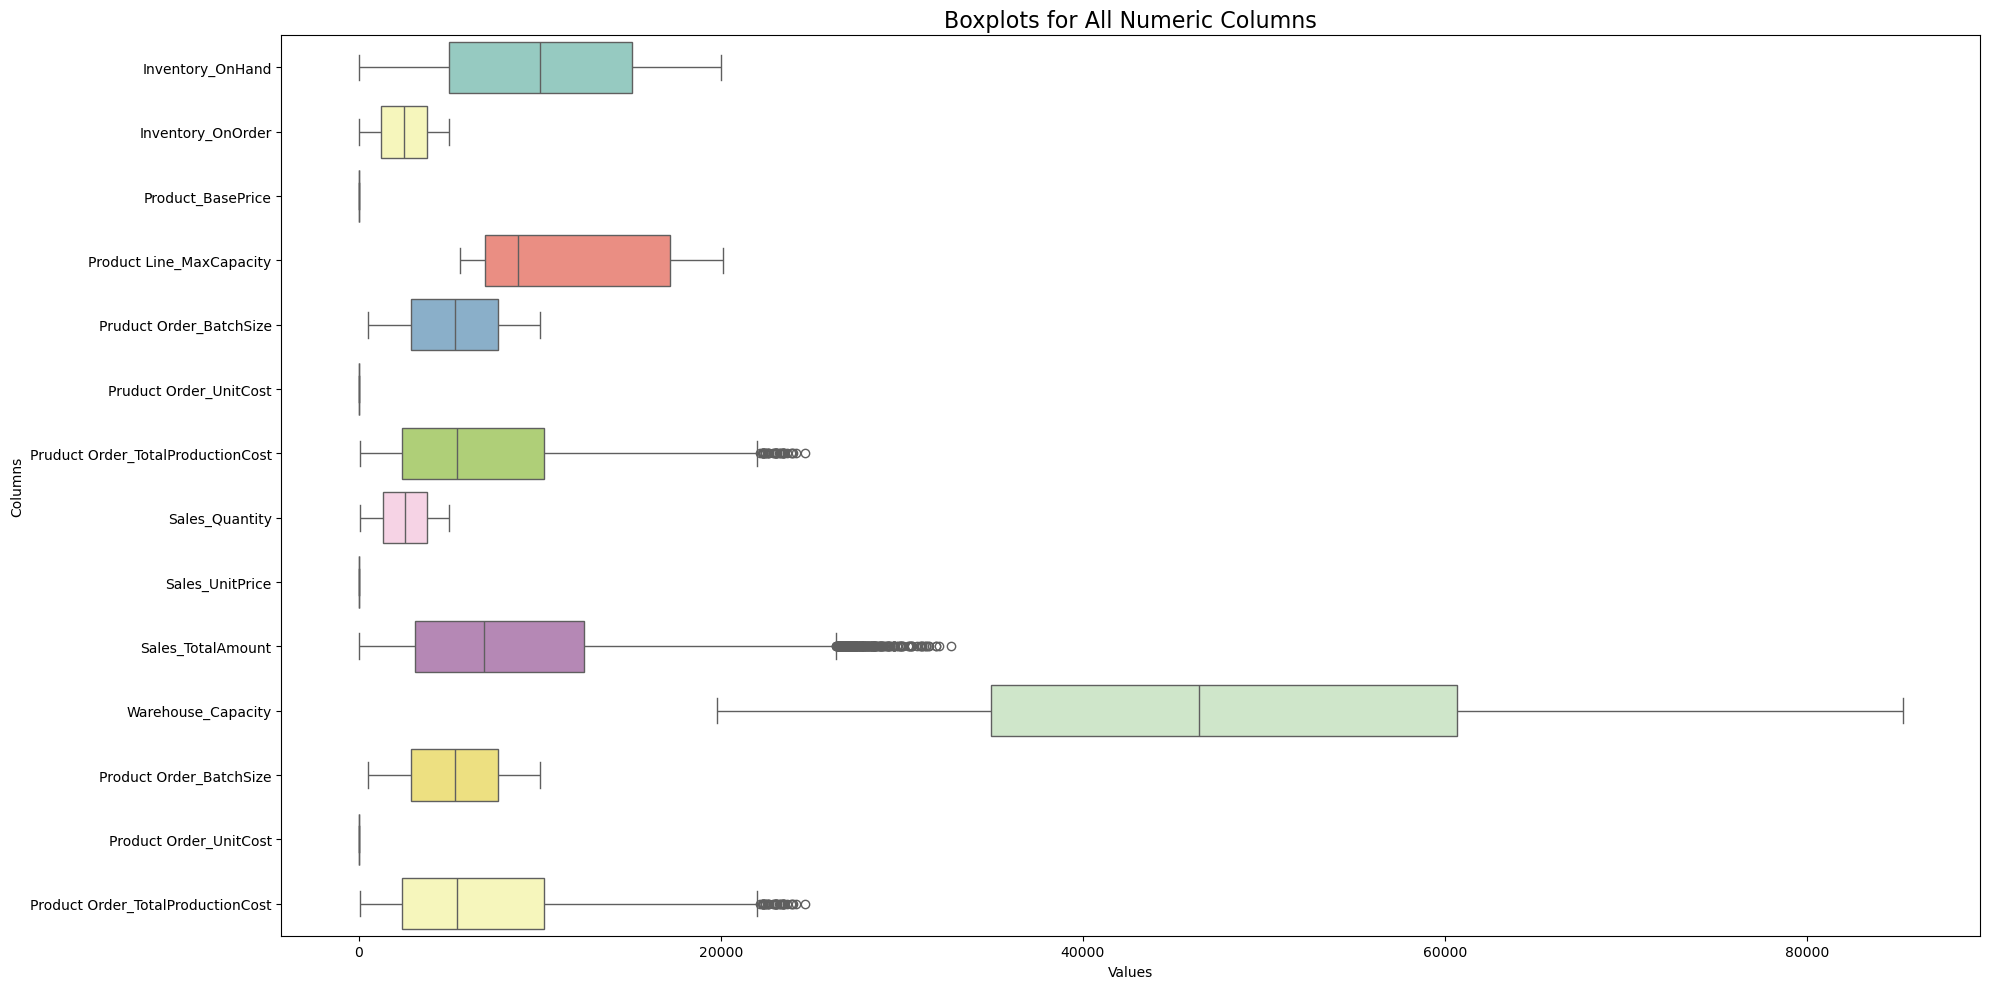

In [59]:
numeric_dfs = []

# Iterate through all DataFrames
for name, df in dataframes.items():
    # Select numeric columns, excluding those containing 'ID'
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])
    numeric_cols = numeric_cols.loc[:, ~numeric_cols.columns.str.contains('ID', case=False)]
    if not numeric_cols.empty:
        numeric_dfs.append(numeric_cols)

# Concatenate all numeric DataFrames
df_num = pd.concat(numeric_dfs, axis=1)

# Ensure column names are unique
df_num.columns = [f"{name}_{col}" for name, df in dataframes.items() for col in df.select_dtypes(include=['int64', 'float64']).columns if 'ID' not in col]

# Plot boxplots for all numeric columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_num, orient='h', palette='Set3')
plt.title('Boxplots for All Numeric Columns', fontsize=16)
plt.xlabel('Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

In [60]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Calculate and print the number of outliers for each column
outlier_counts = {}
for column in df_num.columns:
    outlier_counts[column] = count_outliers(df_num[column])

# Display results
for col, count in outlier_counts.items():
    print(f"Column: {col}, Number of Outliers: {count}")

Column: Inventory_OnHand, Number of Outliers: 0
Column: Inventory_OnOrder, Number of Outliers: 0
Column: Product_BasePrice, Number of Outliers: 0
Column: Product Line_MaxCapacity, Number of Outliers: 0
Column: Pruduct Order_BatchSize, Number of Outliers: 0
Column: Pruduct Order_UnitCost, Number of Outliers: 0
Column: Pruduct Order_TotalProductionCost, Number of Outliers: 38
Column: Sales_Quantity, Number of Outliers: 0
Column: Sales_UnitPrice, Number of Outliers: 0
Column: Sales_TotalAmount, Number of Outliers: 215
Column: Warehouse_Capacity, Number of Outliers: 0
Column: Product Order_BatchSize, Number of Outliers: 0
Column: Product Order_UnitCost, Number of Outliers: 0
Column: Product Order_TotalProductionCost, Number of Outliers: 38


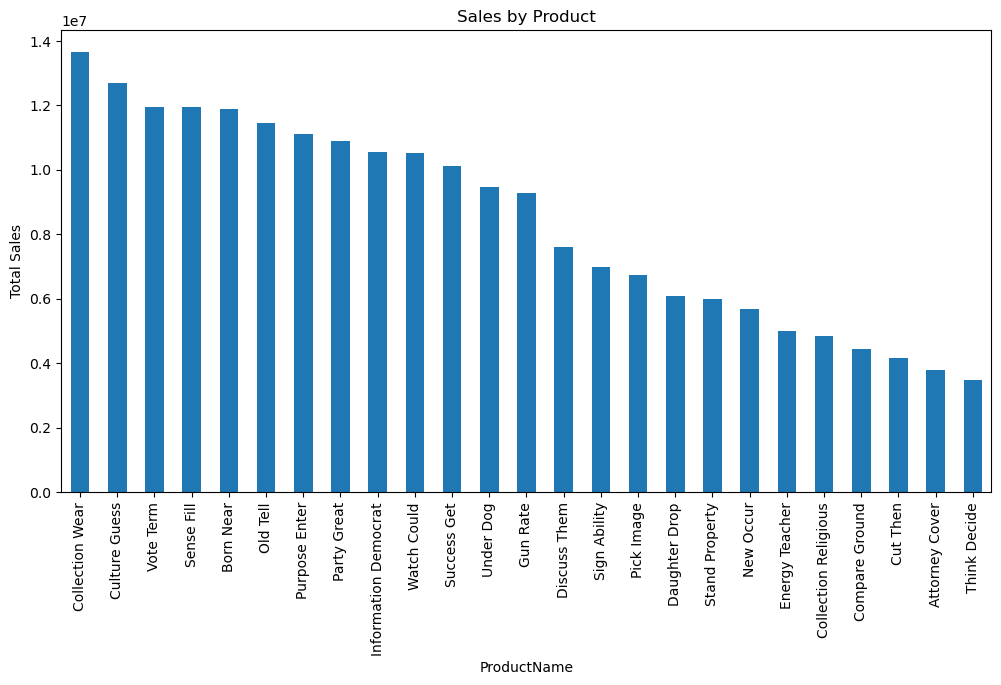

In [61]:
sales_product = sales.merge(product, on='ProductID', how='left')

# Sales by Product
sales_by_product = sales_product.groupby('ProductName')['TotalAmount'].sum().sort_values(ascending=False)
sales_by_product.plot(kind='bar', figsize=(12, 6), title='Sales by Product', ylabel='Total Sales')
plt.show()

In [62]:
top_customers = sales.groupby('CustomerID')['TotalAmount'].sum().nlargest(5)
print(top_customers)

CustomerID
2241    667074.16
2406    615345.40
2389    612107.80
2427    607844.56
2325    604311.00
Name: TotalAmount, dtype: float64


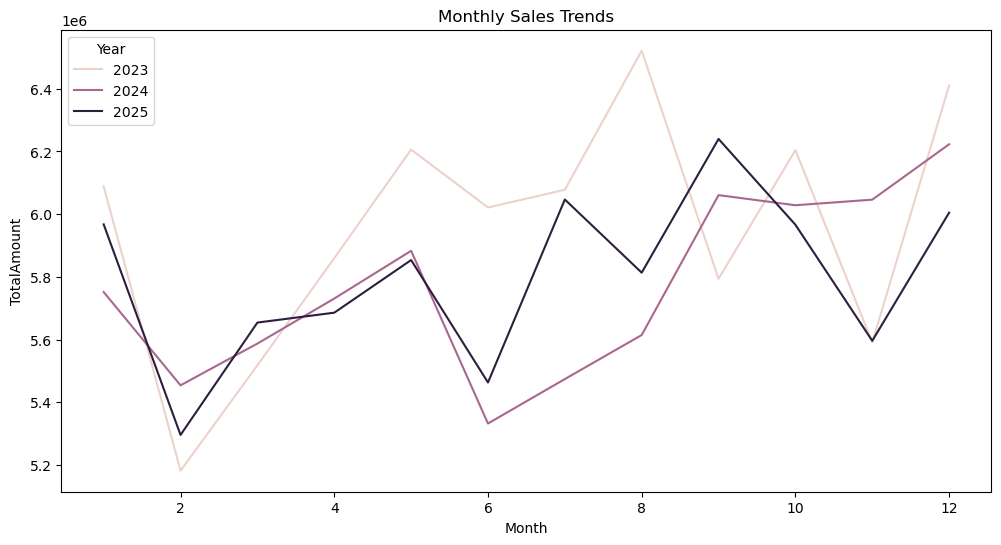

In [63]:
# Convert OrderDate to datetime if not already
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

# Extract month and year for analysis
sales['Month'] = sales['OrderDate'].dt.month
sales['Year'] = sales['OrderDate'].dt.year

# Monthly Sales Trends
monthly_sales = sales.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()

# Plot Monthly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalAmount', hue='Year')
plt.title('Monthly Sales Trends')
plt.show()


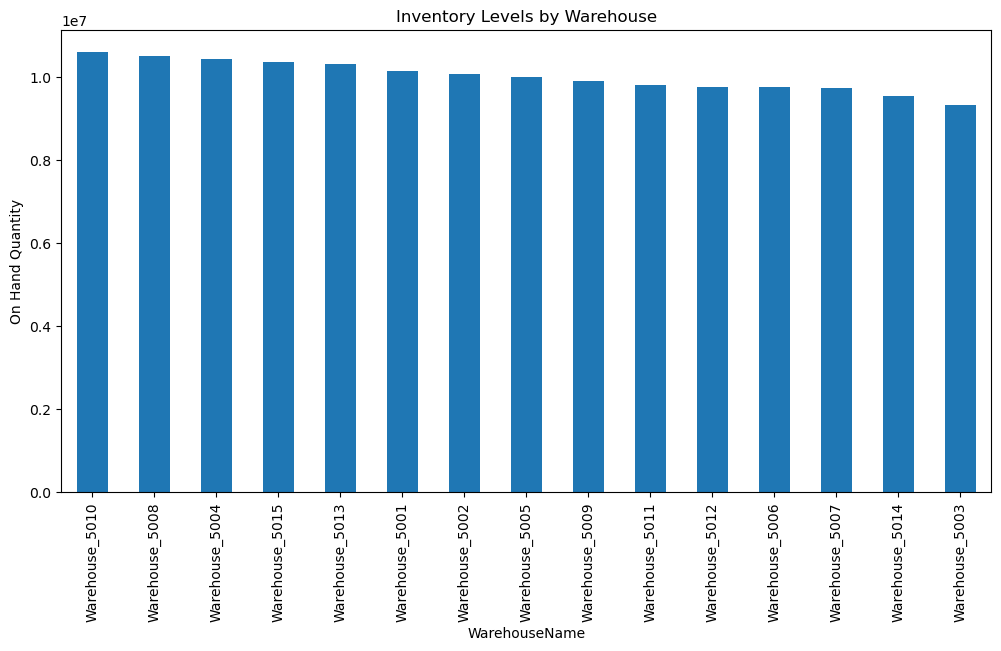

In [64]:
inventory_wh = inventory.merge(wh, on='WarehouseID', how='left')

# Inventory Levels by Warehouse
inventory_levels = inventory_wh.groupby('WarehouseName')['OnHand'].sum().sort_values(ascending=False)
inventory_levels.plot(kind='bar', figsize=(12, 6), title='Inventory Levels by Warehouse', ylabel='On Hand Quantity')
plt.show()

In [90]:
# Merge 1: Sales with Customers and Products
sales_customer_product = sales.merge(customer, on='CustomerID', how='left') \
                              .merge(product, on='ProductID', how='left')

# Merge 2: Inventory with Products and Warehouses
inventory_product_warehouse = inventory.merge(product, on='ProductID', how='left') \
                                       .merge(wh, on='WarehouseID', how='left')

# Merge 3: Production Orders with Production Lines and Products
production_order_details = porder.merge(pline, on='ProductionLineID', how='left') \
                                 .merge(product, on='ProductID', how='left')

In [66]:
# # Merge 4: Combine All Data
# # Integrating Sales, Inventory, Production, and Customer Data
# complete_data = sales_customer_product.merge(inventory, on='ProductID', how='left') \
#                                       .merge(porder, on='ProductID', how='left') \
#                                       .merge(pline, on='ProductionLineID', how='left')

In [67]:
# Preview merged datasets
print("Sales with Customers and Products:\n", sales_customer_product.head())
print("Inventory with Products and Warehouses:\n", inventory_product_warehouse.head())
print("Production Orders with Details:\n", production_order_details.head())

Sales with Customers and Products:
    SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0         10001 2025-06-30        2467       1022       899       3.68   
1         10002 2023-08-23        2084       1002      1157       6.12   
2         10003 2023-06-12        2429       1009      3636       4.07   
3         10004 2025-02-13        2068       1004      1545       2.69   
4         10005 2023-11-24        2203       1009      4195       2.86   

   TotalAmount  Month  Year                     CustomerName  \
0      3308.32      6  2025                  Rosario-Navarro   
1      7080.84      8  2023  Mitchell, Campos and Richardson   
2     14798.52      6  2023                 Hubbard and Sons   
3      4156.05      2  2025        Taylor, Herman and Fisher   
4     11997.70     11  2023                      King-Miller   

         CustomerCity CustomerCountry PaymentTerms    ProductName  \
0   West Jenniferport          Mexico          EOM      Under Dog

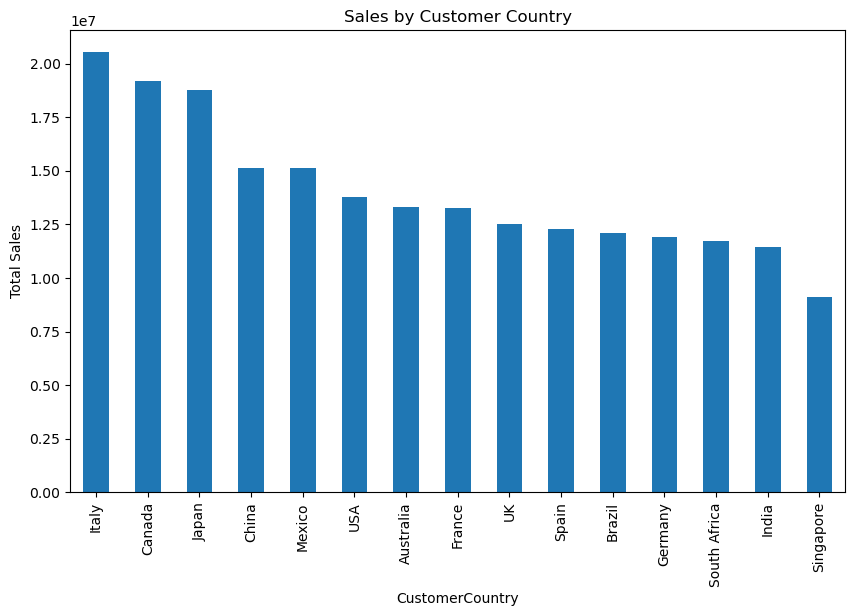

In [68]:
# Group by CustomerCountry and calculate total sales
sales_by_country = sales_customer_product.groupby('CustomerCountry')['TotalAmount'].sum().sort_values(ascending=False)

# Plot the sales performance by country
sales_by_country.plot(kind='bar', figsize=(10, 6), title='Sales by Customer Country', ylabel='Total Sales')
plt.show()

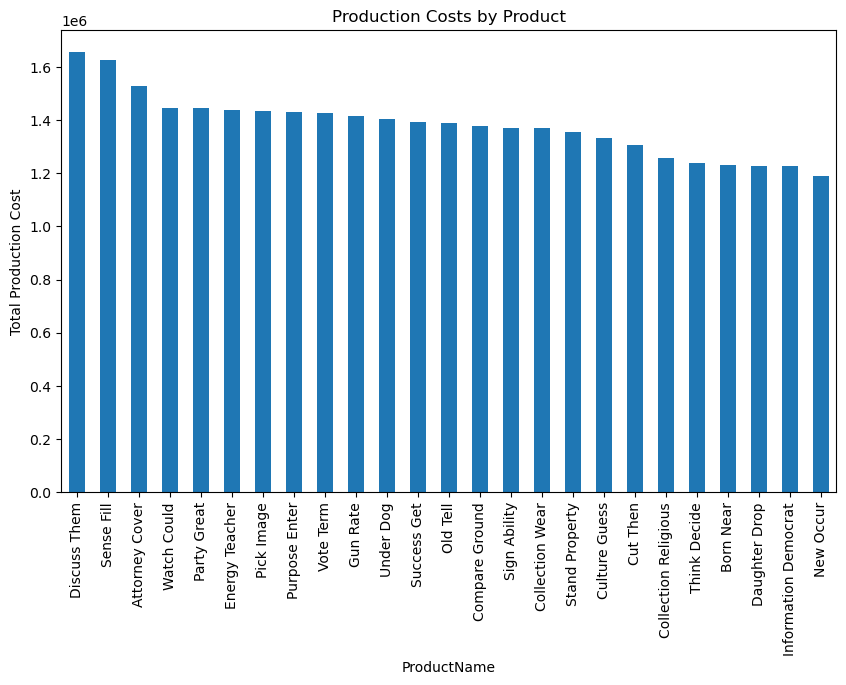

In [69]:
# Group by ProductName and calculate total production cost
production_costs = production_order_details.groupby('ProductName')['TotalProductionCost'].sum().sort_values(ascending=False)

# Plot production costs by product
production_costs.plot(kind='bar', figsize=(10, 6), title='Production Costs by Product', ylabel='Total Production Cost')
plt.show()

In [70]:
# Merge sales and inventory data
sales_inventory = sales_customer_product.merge(inventory_product_warehouse, on='ProductID', how='inner')
print(sales_inventory.head())

   SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0         10001 2025-06-30        2467       1022       899       3.68   
1         10001 2025-06-30        2467       1022       899       3.68   
2         10001 2025-06-30        2467       1022       899       3.68   
3         10001 2025-06-30        2467       1022       899       3.68   
4         10001 2025-06-30        2467       1022       899       3.68   

   TotalAmount  Month  Year     CustomerName  ... OnHand OnOrder LastUpdated  \
0      3308.32      6  2025  Rosario-Navarro  ...  13023    2324  2025-03-25   
1      3308.32      6  2025  Rosario-Navarro  ...   6098    1584  2025-11-02   
2      3308.32      6  2025  Rosario-Navarro  ...  18426     695  2024-03-25   
3      3308.32      6  2025  Rosario-Navarro  ...   9850    3571  2024-02-04   
4      3308.32      6  2025  Rosario-Navarro  ...   3394    2072  2023-06-15   

  ProductName_y ProductCategory_y UnitOfMeasure_y  BasePrice_y  \
0     Un

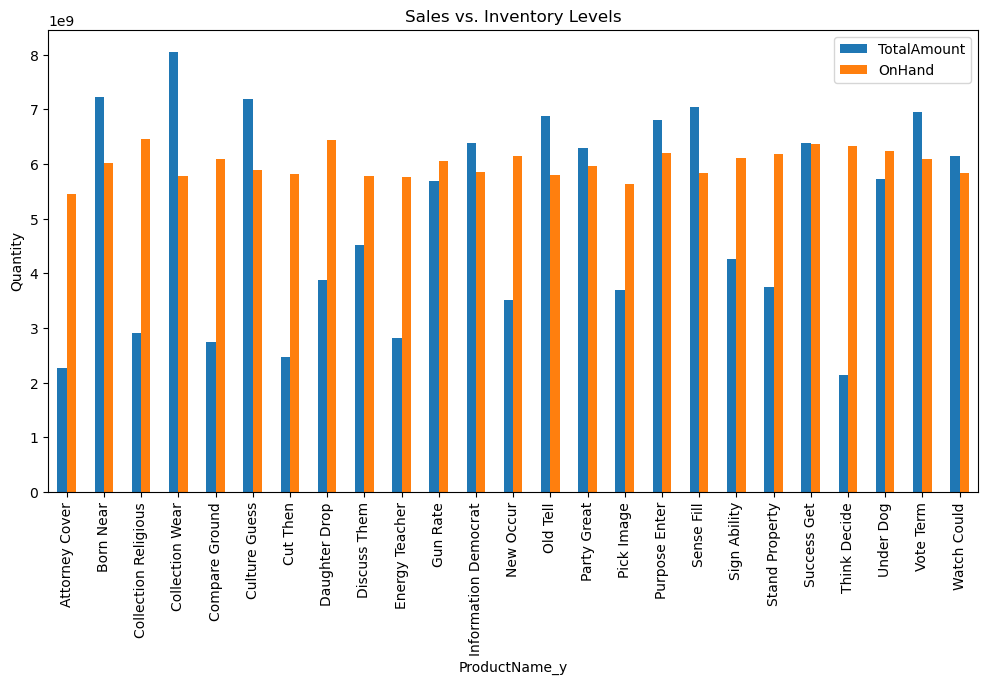

In [71]:
sales_inventory_summary = sales_inventory.groupby('ProductName_y').agg({
    'TotalAmount': 'sum',
    'OnHand': 'sum'
})

# Plot sales vs. inventory
sales_inventory_summary.plot(kind='bar', figsize=(12, 6), title='Sales vs. Inventory Levels', ylabel='Quantity')
plt.show()

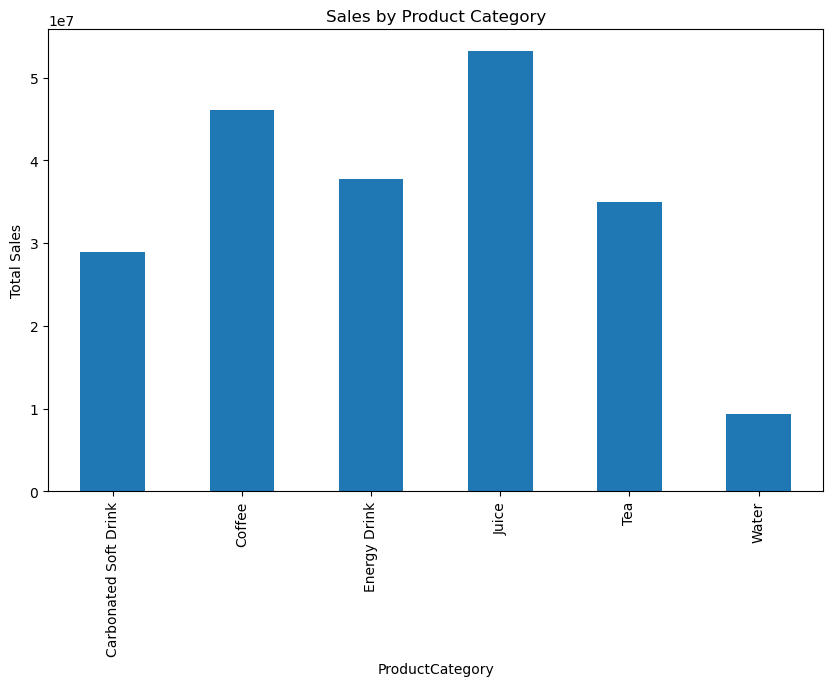

In [72]:
sales_by_category = sales_customer_product.groupby('ProductCategory')['TotalAmount'].sum()
sales_by_category.plot(kind='bar', title='Sales by Product Category', figsize=(10, 6), ylabel='Total Sales')
plt.show()

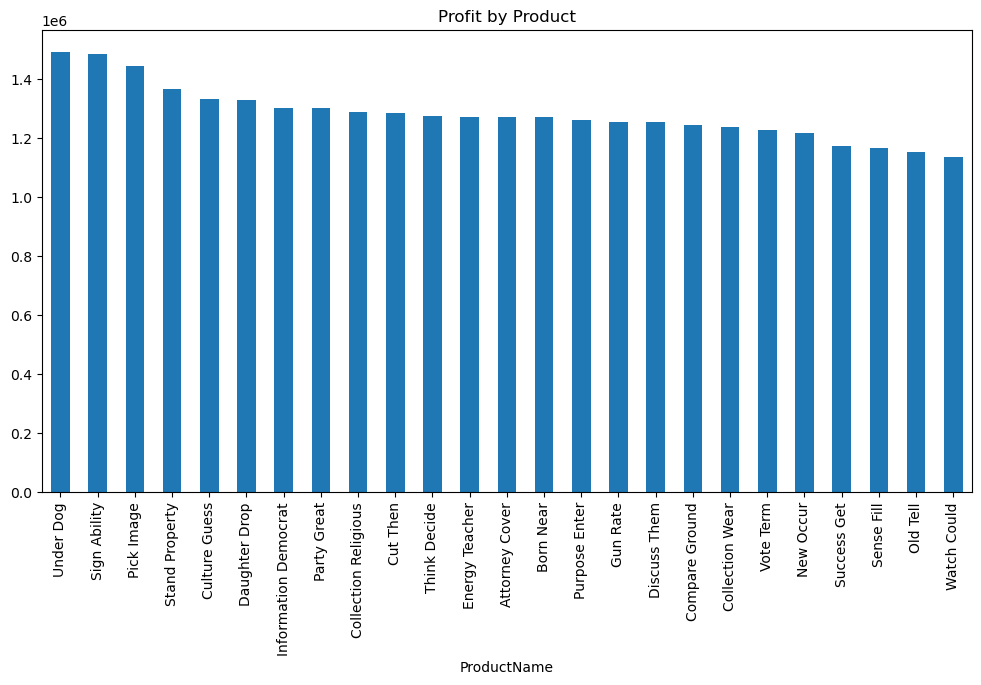

In [73]:
sales_customer_product['Profit'] = sales_customer_product['TotalAmount'] - (sales_customer_product['Quantity'] * sales_customer_product['BasePrice'])
profit_by_product = sales_customer_product.groupby('ProductName')['Profit'].sum().sort_values(ascending=False)
profit_by_product.plot(kind='bar', title='Profit by Product', figsize=(12, 6))
plt.show()

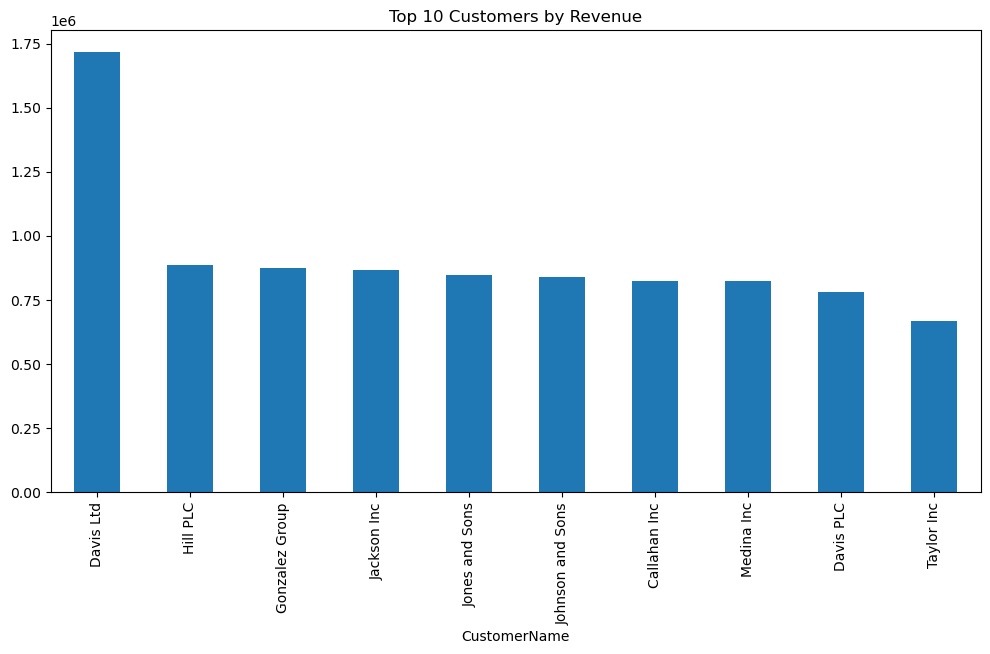

In [74]:
top_customers = sales_customer_product.groupby('CustomerName')['TotalAmount'].sum().nlargest(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue', figsize=(12, 6))
plt.show()

In [75]:
# sales_customer_product['Quarter'] = sales_customer_product['OrderDate'].dt.quarter
# sales_customer_product['Year'] = sales_customer_product['OrderDate'].dt.year
# sales_by_quarter = sales_customer_product.groupby(['Quarter','Year'])['TotalAmount'].sum().unstack()
# sales_by_quarter.plot(kind='line', figsize=(10, 6), title='Quarterly Sales Trends')
# plt.show()


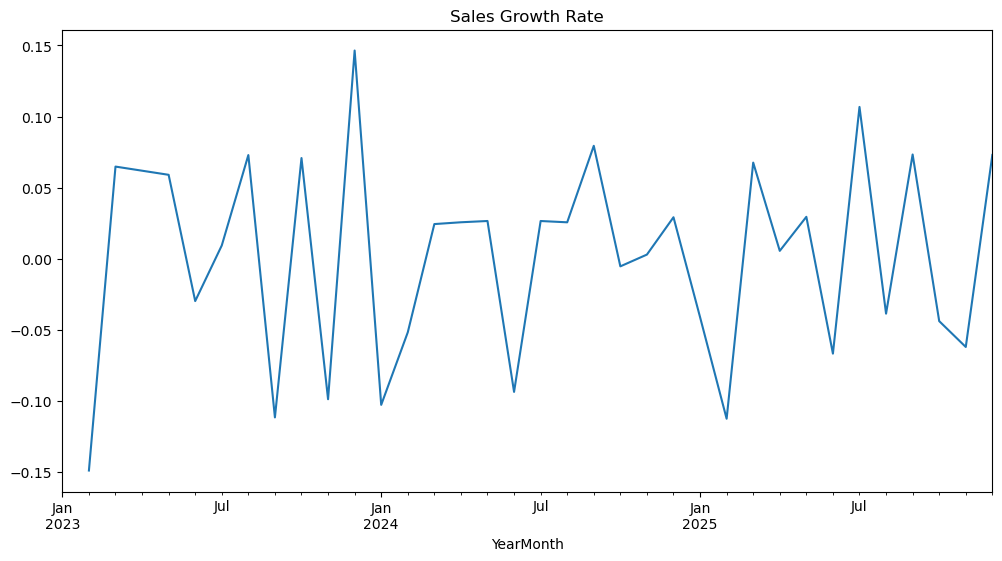

In [76]:
sales_customer_product['YearMonth'] = sales_customer_product['OrderDate'].dt.to_period('M')
sales_growth = sales_customer_product.groupby(['YearMonth'])['TotalAmount'].sum().pct_change()
sales_growth.plot(kind='line', title='Sales Growth Rate', figsize=(12, 6))
plt.show()

38528.80931477351
34650.36058626657
37662.343014642145


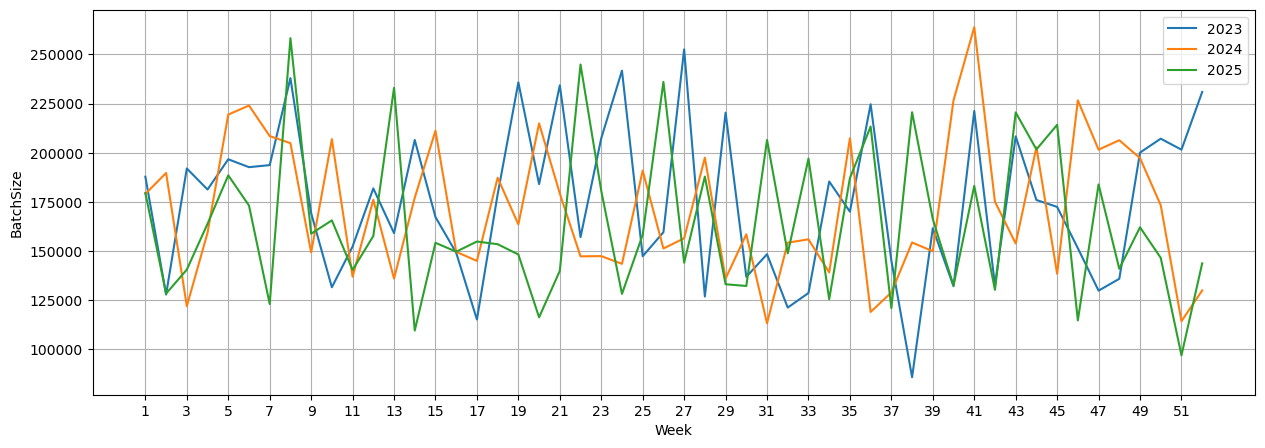

In [ ]:
# # Calculate the week number and add it as a new column
production_order_details["ProductionWeek"] = production_order_details["ProductionDate"].dt.isocalendar().week
production_order_details["ProductionYear"] = production_order_details["ProductionDate"].dt.year


production_trends = production_order_details.groupby(["ProductionYear",'ProductionWeek']).agg({"BatchSize":"sum"}).reset_index()

production_trends_2023 = production_trends.loc[production_trends["ProductionYear"]==2023,:]
production_trends_2024 = production_trends.loc[production_trends["ProductionYear"]==2024,:]
production_trends_2025 = production_trends.loc[production_trends["ProductionYear"]==2025,:]

print(production_trends_2023["BatchSize"].std())
print(production_trends_2024["BatchSize"].std())
print(production_trends_2025["BatchSize"].std())

# # Plot the production trends
plt.figure(figsize=(15,5))
plt.plot(production_trends_2023["ProductionWeek"],production_trends_2023["BatchSize"],label="2023")
plt.plot(production_trends_2024["ProductionWeek"],production_trends_2024["BatchSize"],label="2024")
plt.plot(production_trends_2025["ProductionWeek"],production_trends_2025["BatchSize"],label="2025")
plt.legend()
plt.grid(True)
plt.xticks(range(1,53,2))
plt.xlabel("Week")
plt.ylabel("BatchSize")
plt.show()

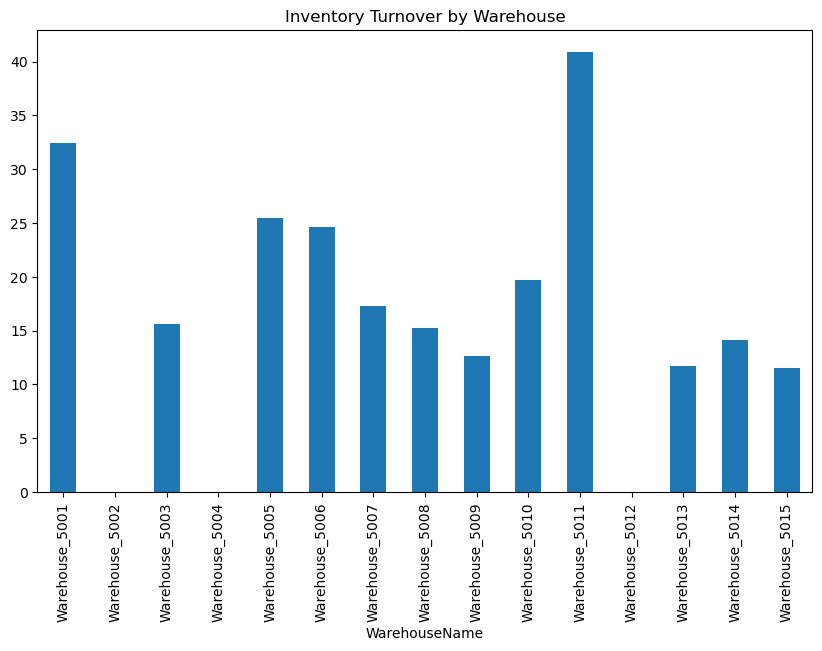

In [78]:
inventory_product_warehouse['TurnoverRate'] = inventory_product_warehouse['OnHand'] / inventory_product_warehouse['OnOrder']
inventory_product_warehouse.groupby('WarehouseName')['TurnoverRate'].mean().plot(kind='bar', title='Inventory Turnover by Warehouse', figsize=(10, 6))
plt.show()

In [79]:
sales_by_product = dataframes["Sales"].merge(dataframes["Product"],on="ProductID",how="left")

In [80]:
sales_by_product.head()

,SalesOrderID,OrderDate,CustomerID,ProductID,Quantity,UnitPrice,TotalAmount,Month,Year,ProductName,ProductCategory,UnitOfMeasure,BasePrice
0,10001,2025-06-30,2467,1022,899,3.68,3308.32,6,2025,Under Dog,Coffee,CASE,2.91
1,10002,2023-08-23,2084,1002,1157,6.12,7080.84,8,2023,Born Near,Energy Drink,BOTTLE,4.36
2,10003,2023-06-12,2429,1009,3636,4.07,14798.52,6,2023,Party Great,Energy Drink,CAN,3.72
3,10004,2025-02-13,2068,1004,1545,2.69,4156.05,2,2025,Daughter Drop,Coffee,CAN,1.87
4,10005,2023-11-24,2203,1009,4195,2.86,11997.70,11,2023,Party Great,Energy Drink,CAN,3.72


In [81]:
sales_by_product["SaleYear"] = sales_by_product["OrderDate"].dt.year
sales_by_product["SaleMonth"] = sales_by_product["OrderDate"].dt.month

In [82]:
grouped_by = sales_by_product.groupby(["SaleYear","ProductCategory"])["TotalAmount"].sum().reset_index()
grouped_by = grouped_by.sort_values(by=["SaleYear","TotalAmount"],ascending=False)

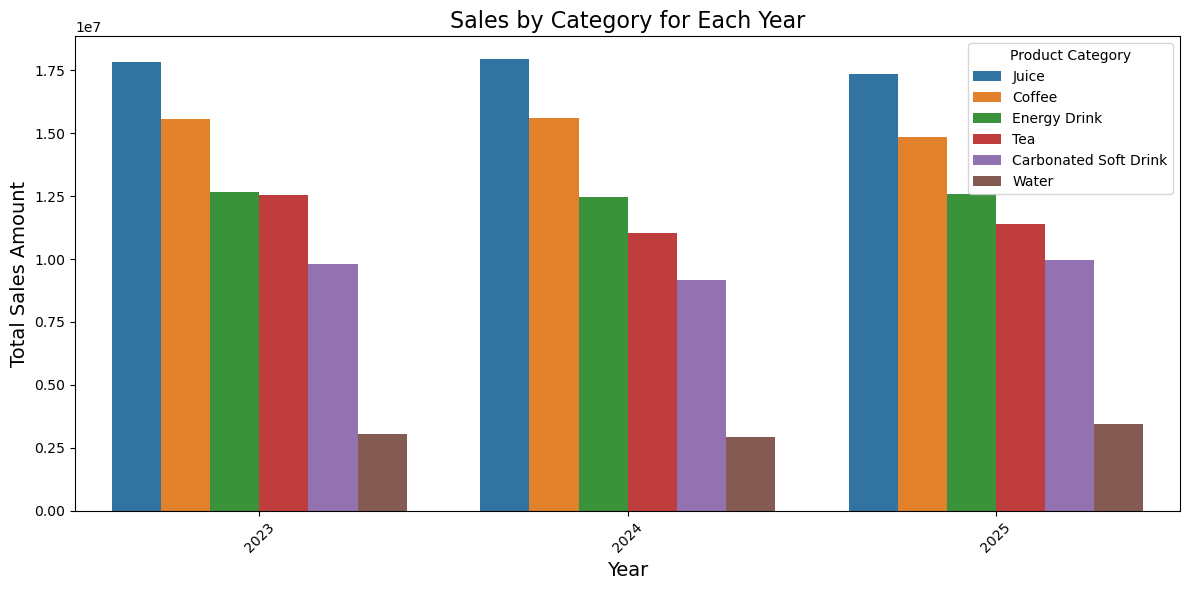

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_by,
    x="SaleYear",
    y="TotalAmount",
    hue="ProductCategory",
)

# Add chart labels and title
plt.title("Sales by Category for Each Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.legend(title="Product Category")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()